<a href="https://colab.research.google.com/github/krishnagorrepati/machine-learing-projects/blob/master/EIP_Phase2_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Used Resnet18 for Cifar10 dataset and ran the model for 20 epochs. On last convlution layer of the model for miscalssified images, GradCom is run to find the activation maps

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-clg2o58g
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-clg2o58g
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-4h2wxib5/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [0]:
from classification_models.resnet import ResNet18



In [0]:
import keras
from keras.layers import Activation, GlobalAveragePooling2D, Conv2D
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)
conv2d_17 = Conv2D(10, (1,1))(base_model.output)
x = GlobalAveragePooling2D(name='GAP')(conv2d_17)
output = Activation('softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0717 17:38:22.513789 139815577163648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
from keras.datasets import cifar10
import numpy as np
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_classes = len(np.unique(train_labels))

In [0]:
(_, _), (_, test_class_labels) = cifar10.load_data()

In [0]:
from keras.utils import np_utils
# train_features = train_features.astype('float32')/255
# test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
def plot_model_history(model_history):
  
  fig, axs = plt.subplots(1,2,figsize=(15,5))
  # summarize history for accuracy
  axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
  axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
  axs[0].set_title('Model Accuracy')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_xlabel('Epoch')
  axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
  axs[0].legend(['train', 'val'], loc='best')
  # summarize history for loss
  axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
  axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
  axs[1].set_title('Model Loss')
  axs[1].set_ylabel('Loss')
  axs[1].set_xlabel('Epoch')
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
  axs[1].legend(['train', 'val'], loc='best')
  plt.show()

In [0]:
def accuracy(test_x, test_y, model):
  
  result = model.predict(test_x)
  predicted_class = np.argmax(result, axis=1)
  true_class = np.argmax(test_y, axis=1)
  num_correct = np.sum(predicted_class == true_class) 
  accuracy = float(num_correct)/result.shape[0]
  return (accuracy * 100)

In [0]:
from keras.callbacks import ModelCheckpoint

filepath = "/content/drive/My Drive/resnet18-cifar10-pretrained-imagenet-without-scaling.h5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks=[checkpointer] 

In [20]:
from keras.preprocessing.image import ImageDataGenerator
import time
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 20, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=callbacks)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Epoch 1/20
  2/390 [..............................] - ETA: 28s - loss: 0.7471 - acc: 0.7148

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=20)`
  # Remove the CWD from sys.path while we load stuff.


390/390 [==============================] - 20s 51ms/step - loss: 0.5986 - acc: 0.7954 - val_loss: 0.9824 - val_acc: 0.7040

Epoch 00001: val_acc improved from -inf to 0.70400, saving model to /content/drive/My Drive/resnet18-cifar10-pretrained-imagenet-without-scaling.h5
Epoch 2/20
390/390 [==============================] - 20s 52ms/step - loss: 0.4286 - acc: 0.8509 - val_loss: 0.6805 - val_acc: 0.7738

Epoch 00002: val_acc improved from 0.70400 to 0.77380, saving model to /content/drive/My Drive/resnet18-cifar10-pretrained-imagenet-without-scaling.h5
Epoch 3/20
390/390 [==============================] - 20s 51ms/step - loss: 0.3224 - acc: 0.8887 - val_loss: 0.8016 - val_acc: 0.7615

Epoch 00003: val_acc did not improve from 0.77380
Epoch 4/20
390/390 [==============================] - 20s 51ms/step - loss: 0.2491 - acc: 0.9131 - val_loss: 0.6450 - val_acc: 0.8050

Epoch 00004: val_acc improved from 0.77380 to 0.80500, saving model to /content/drive/My Drive/resnet18-cifar10-pretrained

NameError: ignored

#### Load the weights

In [0]:
import tensorflow as tf
from keras.models import load_model
model = load_model("/content/drive/My Drive/resnet18-cifar10-pretrained-imagenet-without-scaling.h5", custom_objects={'tf': tf})

In [22]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_73 (ZeroPadding2 (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_73[0][0]          
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
preds = model.predict(test_features)

In [0]:
preds_index = np.argmax(preds,axis=1)

In [0]:
preds_index = preds_index.tolist()
# to convert 2-d array to list 
test_class_labels = test_class_labels.ravel()

In [0]:
# index
correct_index, misclassified_index = [],[]
for i in range(len(test_class_labels)):
  if preds_index[i] == test_class_labels[i]:
    correct_index.append(i)
  else:
    misclassified_index.append(i)

In [27]:
len(correct_index), len(misclassified_index)

(8090, 1910)

In [28]:
import pandas as pd
pd.Series(preds_index).value_counts().sort_index()

0    1092
1    1130
2    1121
3     836
4    1037
5     949
6    1020
7    1018
8    1021
9     776
dtype: int64

In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import keras.backend as K
import numpy as np
import cv2
import sys

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

##### Running Grad cam on last layer and displaying Heatmap on Misclassified Images

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


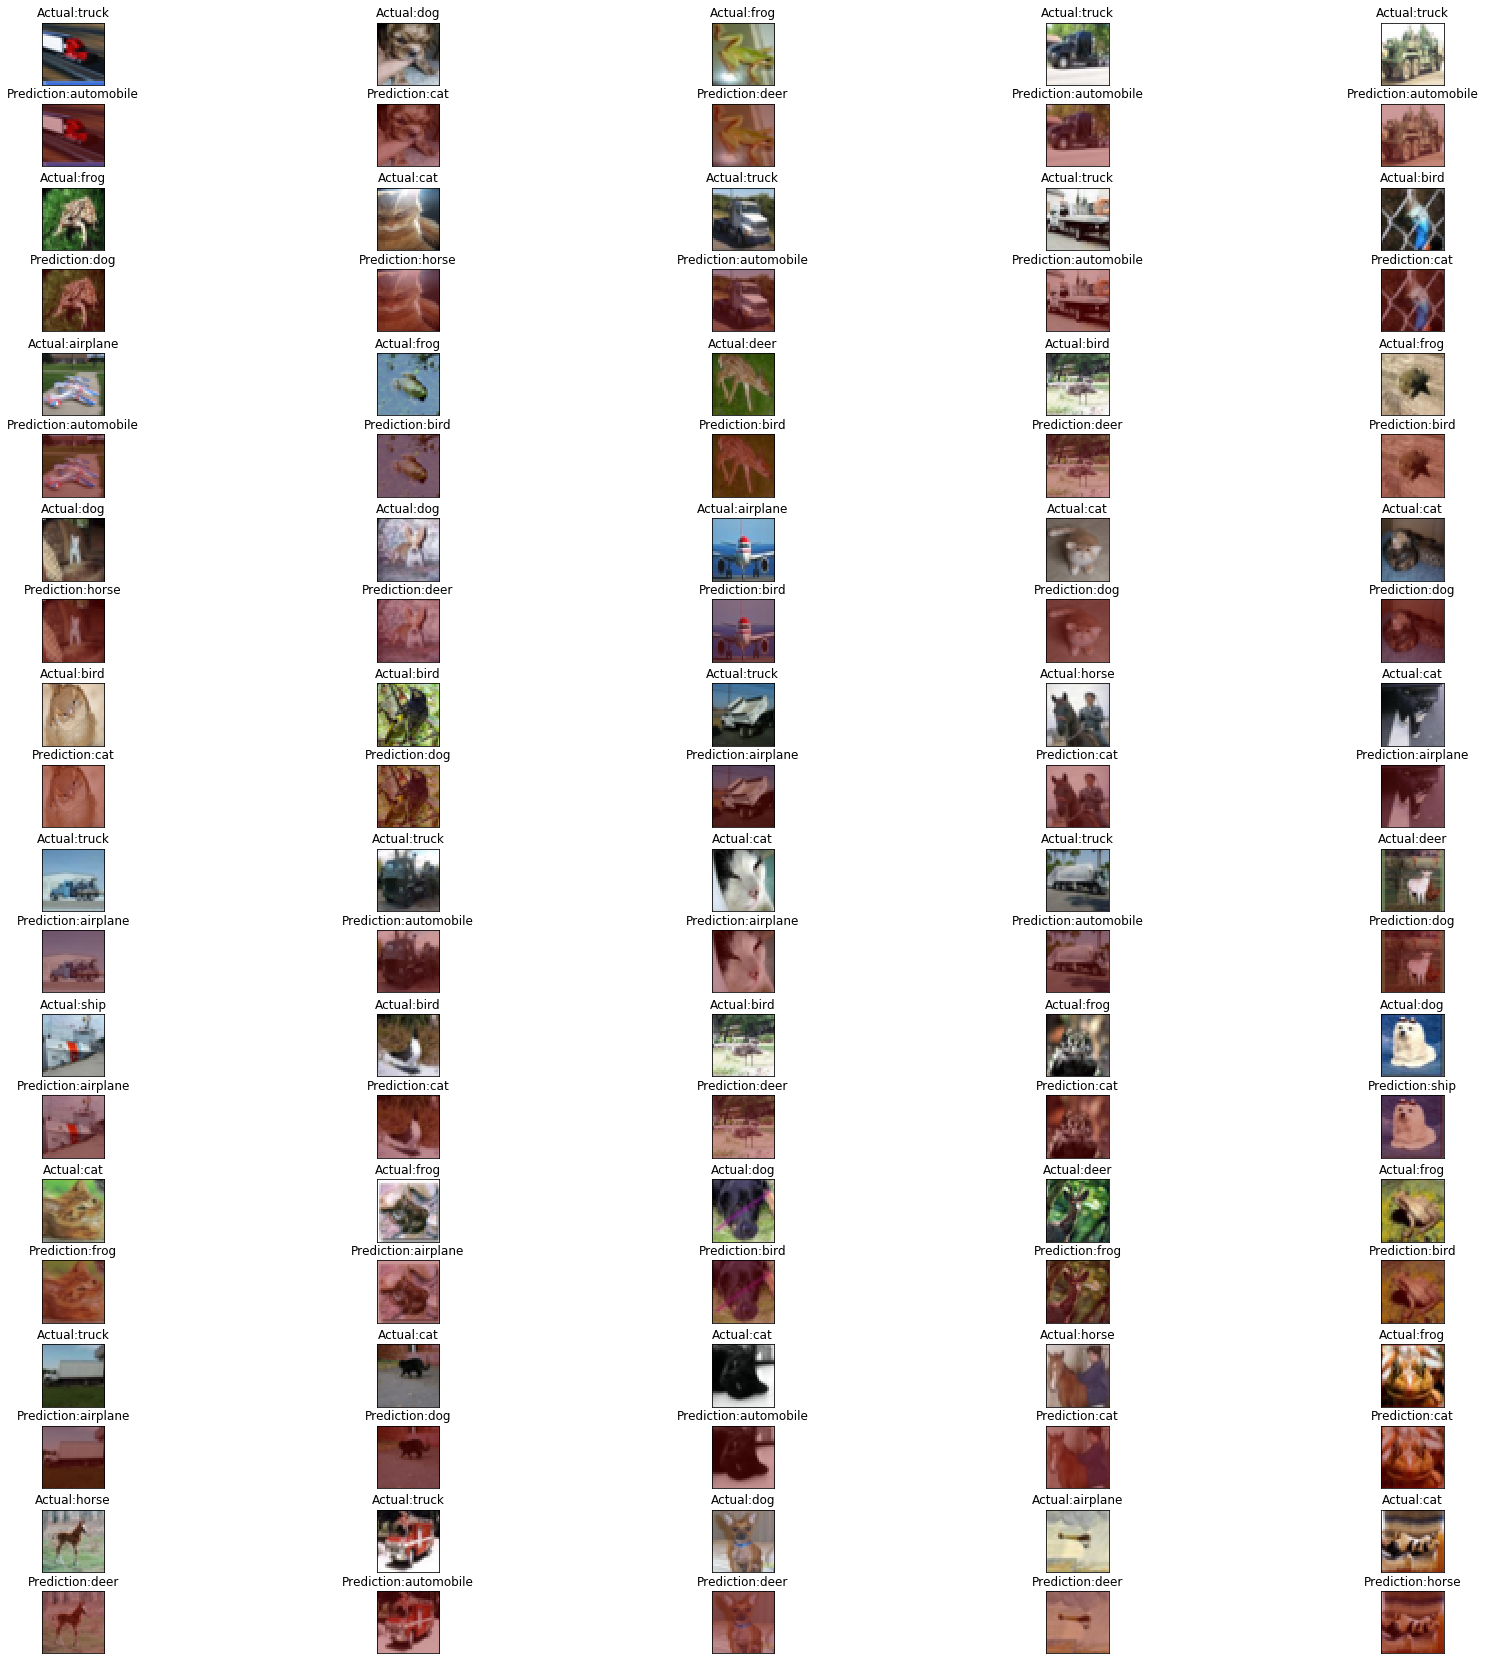

In [32]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(30, 30))
for index, value in enumerate(np.random.choice(misclassified_index, size = 50)):
  
  img = test_features[value]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("stage4_unit2_conv1")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for k in range(128):
    conv_layer_output_value[:, :, k] *= pooled_grads_value[k]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  
  imgs=[img, superimposed_img]
  outer = gridspec.GridSpec(10, 5, wspace=0.0, hspace=0.15)
  inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                  subplot_spec=outer[index], wspace=0.0, hspace=0.30)
  titles=['Actual:'+class_names[np.argmax(test_labels[value])], 'Prediction:'+class_names[class_idx]]
  for j in range(2):
      ax = plt.Subplot(fig, inner[j])
      ax.imshow(imgs[j])
      ax.set_xticks([])
      ax.set_yticks([])
      ax.set_title(titles[j])
      fig.add_subplot(ax)
  
fig.show()